# Introduction

Our goal today is to determine the best neighborhood in Pittsburgh. There are many possible factors as to what can make a neighborhood the "best", but we determined that a general level of safety should be the top priority. In order to determine the safest neighborhood in Pittsburgh, we used data sets on fire and crime incidients to determine how 'dangerous' a certain neighborhood might be; we used a data set on the number of parks to determine the general quality of an overall neighborhood. The "best" neighborhood would appear very low in the crime and fire data sets and high in the parks data set.

# General Metric

Our general metric is based primarily around safety; however, in order to determine a baseline quality of a neighborhood, we used a parks data set. We then weighed crime factors and fire incidents into the data sets to determine the safety of neighborhoods based around their parks.

# Data Set 1: Parks

---


## Number of Parks in the City of Pittsburgh

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Importing Data
parksData = pd.read_csv("parks-pittsburgh.csv")

parksData.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


In [4]:
typeOf = parksData['type'].value_counts()

typeOf.head(10)

Park                     153
Traffic Island/Median     33
Building Grounds          10
Monument/Memorial          7
Open Space                 6
Name: type, dtype: int64

## Graphing amount of Parks per Neighborhood

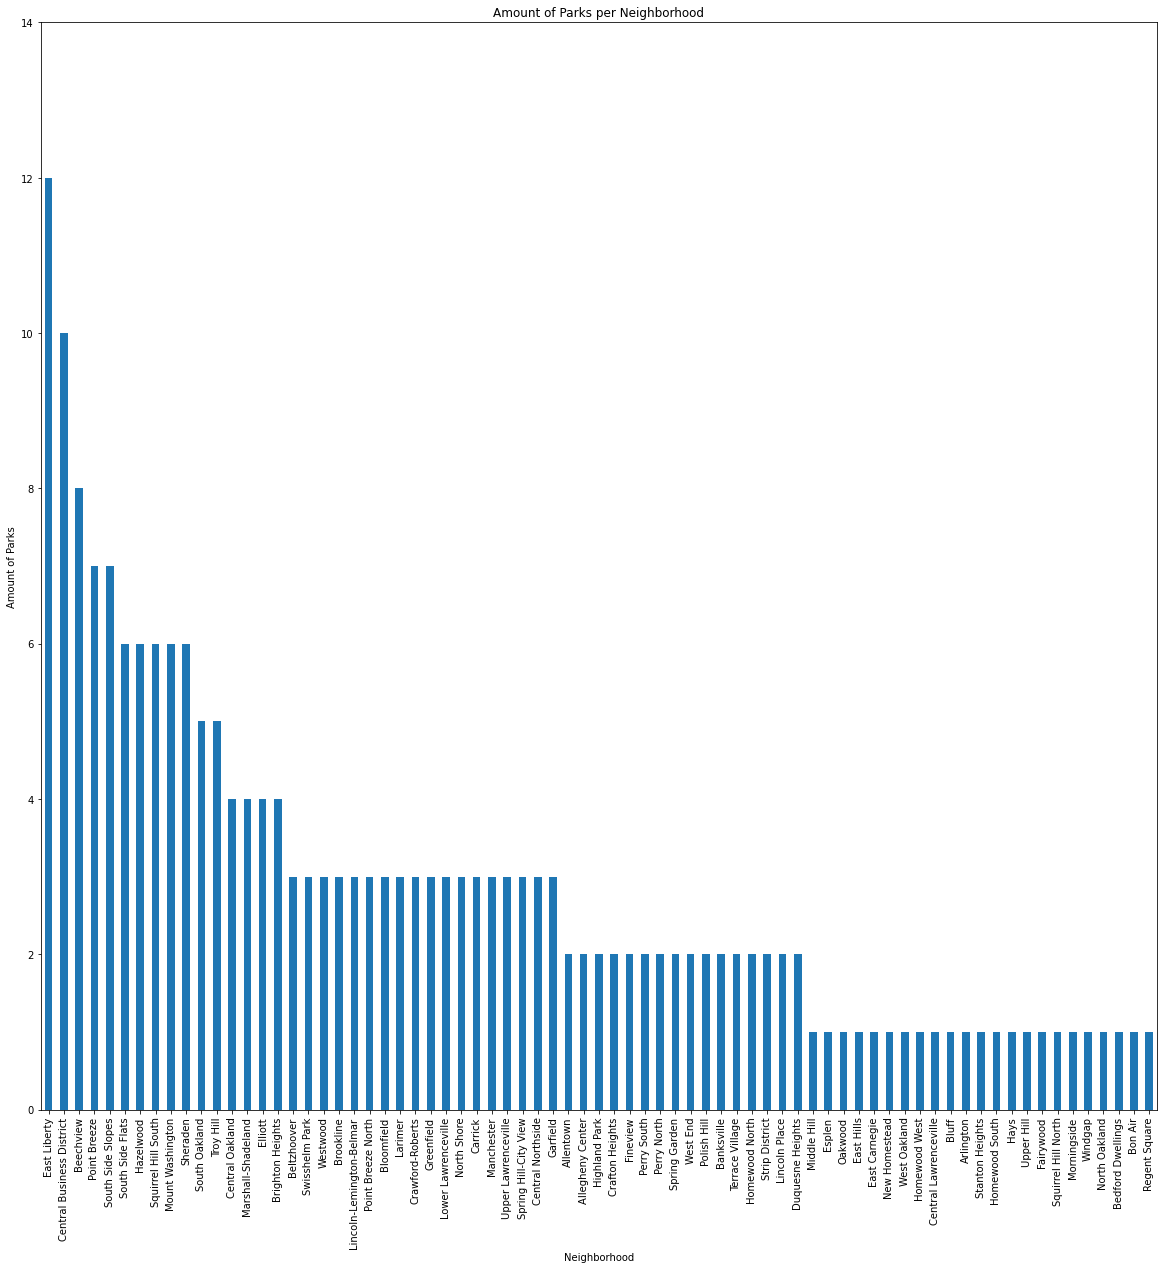

In [5]:
# Get data related to arrests within certain neighborhoods
rateOfPark = parksData['neighborhood'].value_counts()
rateOfPark.plot(kind="bar", ylim=[0,14], figsize=(20,20))
plt.title("Amount of Parks per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount of Parks")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

### Analysis

The amount of parks per neighborhood is an indicator of how good a neighborhood is. So, the more parks there are in any neighborhood, the quality of that neighborhood would then be higher. As seen as the graph above, East Liberty has 12 Parks, making it (according to this very specific standard), the best neighborhood in Pittsburgh.

# Data Set 2: Crime
---


## Police Arrests in the City of Pittsburgh

In [6]:
# Import data
police_arrests = pd.read_csv("police-arrest.csv")

police_arrests.head(10)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,0.000000,0.000000
9,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


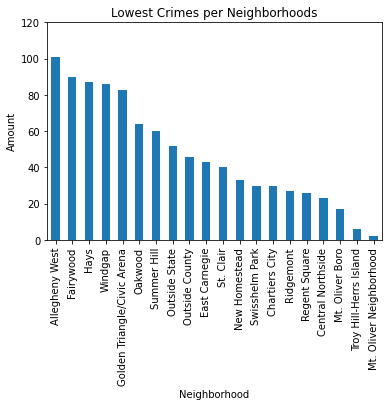

In [7]:
# Get data related to arrests within certain neighborhoods, then plot that data
rates = police_arrests['INCIDENTNEIGHBORHOOD'].value_counts()
rates.tail(20).plot(kind="bar", ylim=[0,120])
plt.title("Lowest Crimes per Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")



## Graphical Data

Going simply off of this graph, the two neighborhoods with the lowest amount of arrests would be Troy Hill-Herrs Island and Mt. Oliver Neighborhood. Although, the number of arrests within a neighborhood is a very specific metric. There are other things that will determine what should be considered as the best Pittsburgh neighborhood to live in. To start looking at this, we will broaden our data. Instead of looking at the number of arrests, we will look at a different data set which talks about general crime rate for major crimes. 

In [8]:
# Read in new data set, print out first 10 instances
major_arrests = pd.read_csv("arrests-for-major-crimes-1972.csv")
major_arrests.head(10)

,neighborhood,population,overall_crime_rate,number_arrests_murder,crime_rate_murder,number_arrests_rape,crime_rate_rape,number_arrests_robbery,crime_rate_robbery,number_arrests_assault,crime_rate_assault,number_arrests_burglary,crime_rate_burglary,number_arrests_larceny,crime_rate_larceny
0,31st Ward,7594,2.03,0,0.00,1,0.01,7,0.09,45,0.60,55,0.73,45,0.60
1,Allegheny Center,588,52.04,0,0.00,2,0.34,24,4.08,30,5.10,14,2.38,236,40.14
2,Allegheny West,1159,14.33,1,0.09,3,0.26,16,1.38,17,1.47,53,4.57,76,6.56
3,Allentown,5042,3.13,0,0.00,1,0.08,23,0.46,41,0.81,48,0.95,45,0.89
4,Arlington,4758,2.50,0,0.00,0,0.00,7,0.15,33,0.69,44,0.92,35,0.74
5,Arlington Heights,1989,6.19,0,0.00,2,0.10,14,0.70,61,3.07,21,1.06,25,1.26
6,Banksville,6235,1.94,0,0.00,2,0.03,8,0.13,8,0.13,53,0.85,50,0.80
7,Bedford Dwellings,3635,2.64,1,0.03,4,0.11,11,0.30,25,0.69,36,0.99,19,0.52
8,Beechview,12965,1.98,1,0.01,1,0.01,26,0.20,43,0.33,84,0.65,101,0.78
9,Beltzhoover,5980,6.37,1,0.02,3,0.05,63,1.05,58,0.97,121,2.02,135,2.26


Text(0, 0.5, 'Amount')

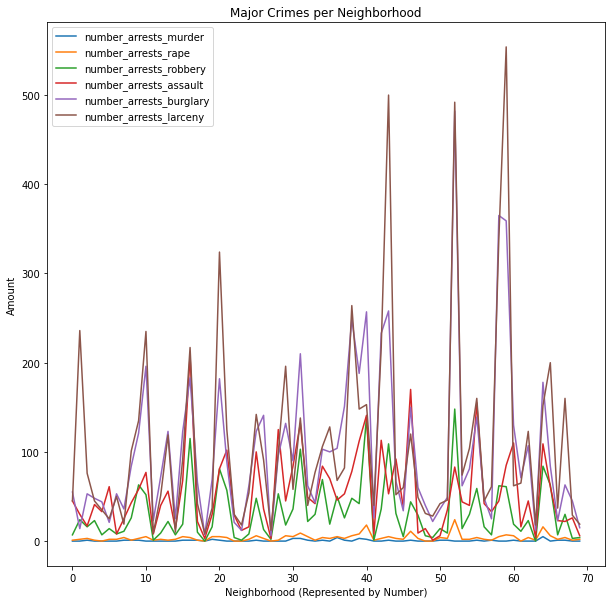

In [9]:
# Here, we are assigning each major type of crime to its own Pandas Series. These series will contain a number representing 
# a specific neighborhood (alphabetical order cooreseponds to numerical order) as well as a value for how many arrests there 
# were for that particular type of crime. From there, this data will be plotted onto the same type so we can see which type 
# of crime is most common in which neighborhood.

arrests_murder = major_arrests['number_arrests_murder']
arrests_rape = major_arrests['number_arrests_rape']
arrests_robbery = major_arrests['number_arrests_robbery']
arrests_assault = major_arrests['number_arrests_assault']
arrests_burglary = major_arrests['number_arrests_burglary']
arrests_larceny = major_arrests['number_arrests_larceny']

arrests_total = pd.concat([arrests_murder, arrests_rape, arrests_robbery, arrests_assault, arrests_burglary, arrests_larceny], axis=1)
arrests_total.plot(figsize=(10, 10))

plt.title("Major Crimes per Neighborhood")
plt.xlabel("Neighborhood (Represented by Number)")
plt.ylabel("Amount")


From this graph, we can see that typically larceny, or theft of personal property, is much higher than the other major crimes that come close to it, which in this case would be burglary and assualt. However, this graph can be improved again if instead of using the physical numbers, we use the total crime RATE of each of the neighborhoods.

Text(0, 0.5, 'Amount')

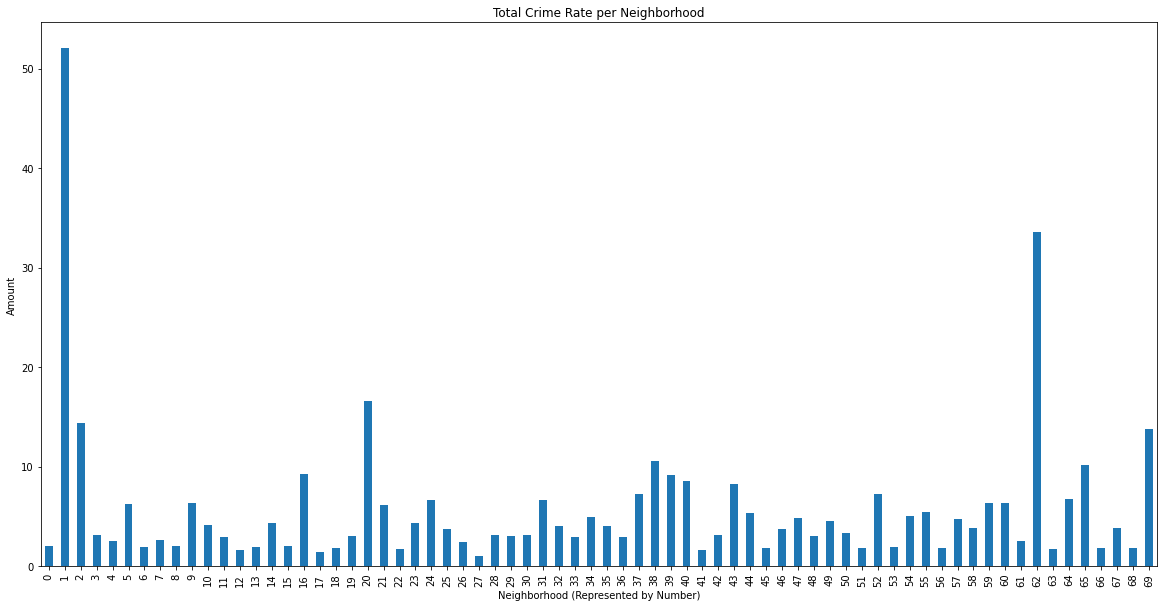

In [10]:
# Thanks to this new data set, we are given the population, and as a result the crime rate for each neighborhood.
# Now we can plot this on it's own graph.

crime_rate = major_arrests['overall_crime_rate']
crime_rate.plot(kind="bar", figsize=(20,10))

plt.title("Total Crime Rate per Neighborhood")
plt.xlabel("Neighborhood (Represented by Number)")
plt.ylabel("Amount")

# Getting the Lowest rates of Crime from the Graph

Now, given this graph, there is still a lot of data, so we can break it down into the neighborhoods that have the lowest crime rates. This will make the data more presentable and easier to digest.

In [11]:
# Here, we create a new dictionary for the neighborhoods with the lowest crime rates. We will loop through each neighbohood
# and check to see if it's crime rate is less than a certain threshold, in this case, 2. From here we add a new key/value
# pair, the neighborhood and its cooresponding crime rate. Then, we trasnfer that to a Pandas Series so for ease of 
# graphing later on.

low_rates = {}

for x in range(len(crime_rate)):
    if crime_rate[x] < 2:
        if crime_rate[x] not in low_rates:
            low_rates[major_arrests['neighborhood'][x]] = crime_rate[x]
            
low_rates_dataframe = pd.Series(low_rates)
print(low_rates_dataframe)

Banksville                              1.94
Beechview                               1.98
Brighton Heights                        1.64
Brookline                               1.91
Carrick                                 1.98
Crafton Heights - Westwood - Oakwood    1.41
East Carnegie                           1.82
Elliot                                  1.70
Harpen Hilltop                          0.99
Morningside                             1.61
Perry North                             1.84
Shadeland Halls Grove                   1.79
Sheraton Chartiers                      1.96
Southside Slopes                        1.82
Swisshelm Park                          1.72
Troy Hill                               1.78
Upper Lawrenceville                     1.80
dtype: float64


# Lowest Crime Rates

This data provides us with the neighborhoods with the lowest crime rate, calculated from the major arrests in each area. From here, we can graph this data and find the neighborhood(s) with the lowest amount of crime per populus.

Text(0, 0.5, 'Amount')

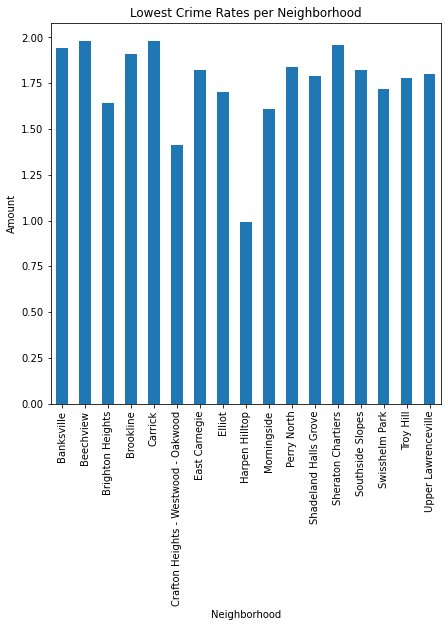

In [12]:
low_rates_dataframe.plot.bar(figsize=(7, 7))

plt.title("Lowest Crime Rates per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

# Conclusion From the Data

After looking at total crime rate, we can see that our outcome is completely different! Now, our neighborhoods with the lowest amount of major crimes are Morningside, Crafton Heights - Westwood - Oakwood, and Elliot. Now, we can take this information and combine it with our other metrics to get a more refined answer to our question.

# Data Set 3: Fires
---

## Fire Incidents in the City of Pittsburgh

In [13]:
fireIncidents = pd.read_csv("fire-incidents-pittsburgh.csv")
fireIncidents.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


In [14]:
fireIncidents["neighborhood"].value_counts().tail(50)

Troy Hill               66
Manchester              66
Point Breeze            65
Elliott                 61
Northview Heights       60
North Shore             56
West Oakland            55
Banksville              54
Lincoln Place           54
Allegheny Center        53
Stanton Heights         52
Homewood West           50
Overbrook               49
Lower Lawrenceville     49
Strip District          47
Fineview                45
Arlington               44
Upper Lawrenceville     42
Upper Hill              42
Point Breeze North      42
Bedford Dwellings       38
Allegheny West          37
Chateau                 37
California-Kirkbride    35
Polish Hill             34
Duquesne Heights        33
Morningside             30
Friendship              28
Westwood                23
Fairywood               23
Spring Garden           21
South Shore             21
New Homestead           20
Glen Hazel              19
Summer Hill             19
West End                18
Esplen                  18
B

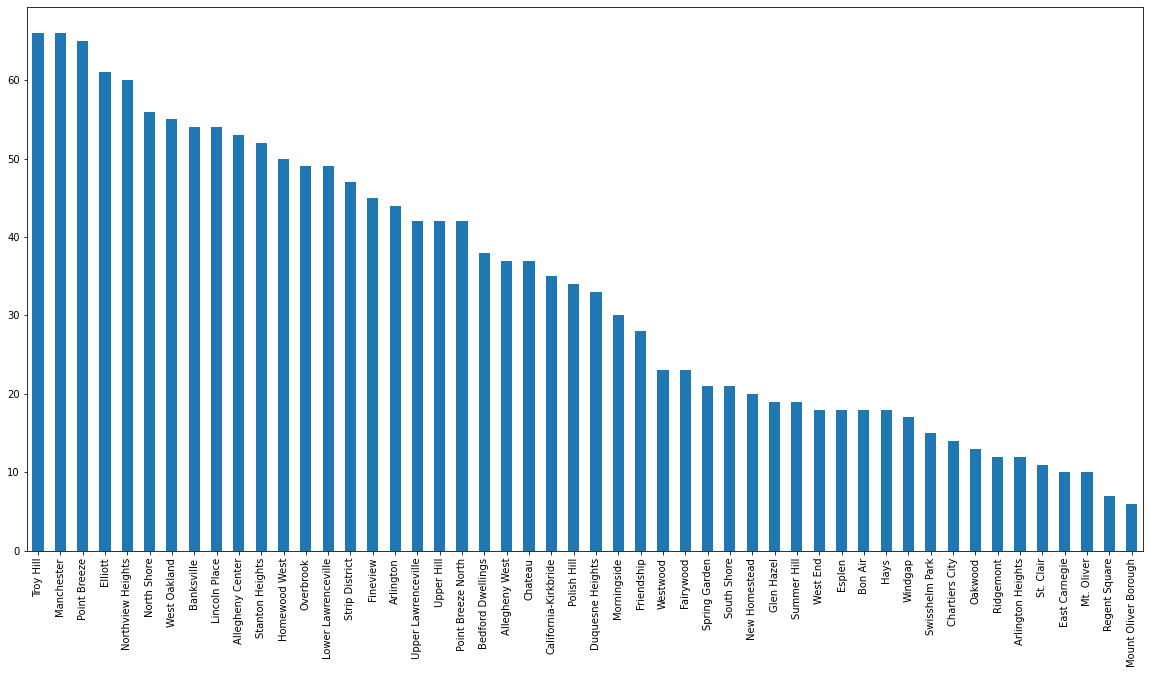

In [15]:
fireIncidents["neighborhood"].value_counts().tail(50).plot(kind="bar", figsize=(20, 10))

# Conclusion
---

In [16]:
leastFireNeighborhoods = []
for neighborhood in fireIncidents["neighborhood"].value_counts().tail(35).index.tolist():
    if isinstance(neighborhood, str):
        leastFireNeighborhoods.append(neighborhood)
    
print(leastFireNeighborhoods)

['Fineview', 'Arlington', 'Upper Lawrenceville', 'Upper Hill', 'Point Breeze North', 'Bedford Dwellings', 'Allegheny West', 'Chateau', 'California-Kirkbride', 'Polish Hill', 'Duquesne Heights', 'Morningside', 'Friendship', 'Westwood', 'Fairywood', 'Spring Garden', 'South Shore', 'New Homestead', 'Glen Hazel', 'Summer Hill', 'West End', 'Esplen', 'Bon Air', 'Hays', 'Windgap', 'Swisshelm Park', 'Chartiers City', 'Oakwood', 'Ridgemont', 'Arlington Heights', 'St. Clair', 'East Carnegie', 'Mt. Oliver', 'Regent Square', 'Mount Oliver Borough']


In [17]:
least_crime_neighborhood = []
for n in low_rates_dataframe.index.tolist():
    least_crime_neighborhood.append(n)
    
print(least_crime_neighborhood)

['Banksville', 'Beechview', 'Brighton Heights', 'Brookline', 'Carrick', 'Crafton Heights - Westwood - Oakwood', 'East Carnegie', 'Elliot', 'Harpen Hilltop', 'Morningside', 'Perry North', 'Shadeland Halls Grove', 'Sheraton Chartiers', 'Southside Slopes', 'Swisshelm Park', 'Troy Hill', 'Upper Lawrenceville']


In [18]:
most_parks = []
for p in parksData["neighborhood"].value_counts().head(35).index.tolist():
    most_parks.append(p)
    
print(most_parks)

['East Liberty', 'Central Business District', 'Beechview', 'Point Breeze', 'South Side Slopes', 'South Side Flats', 'Hazelwood', 'Squirrel Hill South', 'Mount Washington', 'Sheraden', 'South Oakland', 'Troy Hill', 'Central Oakland', 'Marshall-Shadeland', 'Elliott', 'Brighton Heights', 'Beltzhoover', 'Swisshelm Park', 'Westwood', 'Brookline', 'Lincoln-Lemington-Belmar', 'Point Breeze North', 'Bloomfield', 'Larimer', 'Crawford-Roberts', 'Greenfield', 'Lower Lawrenceville', 'North Shore', 'Carrick', 'Manchester', 'Upper Lawrenceville', 'Spring Hill-City View', 'Central Northside', 'Garfield', 'Allentown']


In [19]:
common_neighborhoods = []
for x in most_parks:
    if x in least_crime_neighborhood: #most important
        if x in leastFireNeighborhoods: #2nd important
            if x not in common_neighborhoods: #least important
                common_neighborhoods.append(x)
                
print(common_neighborhoods)
print(len(common_neighborhoods))

['Swisshelm Park', 'Upper Lawrenceville']
2


## Upper Lawrenceville is the best Neighboorhood in Pittsburgh!

After looking at the overlapping data sets, we have determined that Upper Lawrenceville is the best neighborhood in Pittsburgh. Among the three data sets, it, as well as Swisshelm Park, ranked the lowest for crime and fire incidents with a higher than average level of parks. We determined though that Upper Lawrenceville is the best neighborhood due to its location and community as well.